In [2]:
import time
from tqdm import *
import random
from math import *
import operator
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
"""
5. Number of Instances: 214
6. Number of Attributes: 10 (including an Id#) plus the class attribute
   -- all attributes are continuously valued
7. Attribute Information:
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
                  are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps

9. Class Distribution: (out of 214 total instances)
    -- 163 Window glass (building windows and vehicle windows)
       -- 87 float processed  
          -- 70 building windows
          -- 17 vehicle windows
       -- 76 non-float processed
          -- 76 building windows
          -- 0 vehicle windows
    -- 51 Non-window glass
       -- 13 containers
       -- 9 tableware
       -- 29 headlamps
"""

'\n5. Number of Instances: 214\n6. Number of Attributes: 10 (including an Id#) plus the class attribute\n   -- all attributes are continuously valued\n7. Attribute Information:\n   1. Id number: 1 to 214\n   2. RI: refractive index\n   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as \n                  are attributes 4-10)\n   4. Mg: Magnesium\n   5. Al: Aluminum\n   6. Si: Silicon\n   7. K: Potassium\n   8. Ca: Calcium\n   9. Ba: Barium\n  10. Fe: Iron\n  11. Type of glass: (class attribute)\n      -- 1 building_windows_float_processed\n      -- 2 building_windows_non_float_processed\n      -- 3 vehicle_windows_float_processed\n      -- 4 vehicle_windows_non_float_processed (none in this database)\n      -- 5 containers\n      -- 6 tableware\n      -- 7 headlamps\n\n9. Class Distribution: (out of 214 total instances)\n    -- 163 Window glass (building windows and vehicle windows)\n       -- 87 float processed  \n          -- 70 building windows\n          --

In [7]:
location = r"E:\Python\Machine Learning\datasets\glass.csv"
glass = pd.read_csv(location,  index_col='Id')

In [4]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']

glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort_values('al', inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


Question: Pretend that we want to predict ri, and our only feature is al. 

Answer: We could frame it as a regression problem, and use a linear regression model with al as the only feature and ri as the response.

Question: How would we visualize this model?

Answer: Create a scatter plot with al on the x-axis and ri on the y-axis, and draw the line of best fit.

In [8]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


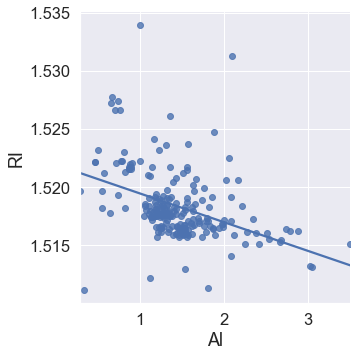

In [10]:
sns.lmplot(x='Al', y='RI', data=glass, ci=None)

Question: How would we draw this plot without using Seaborn?

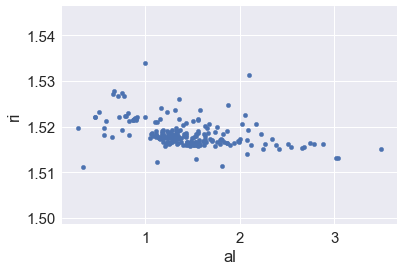

In [6]:
# scatter plot using Pandas
glass.plot(kind='scatter', x='al', y='ri')

Text(0,0.5,'ri')

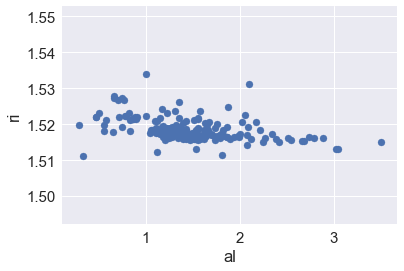

In [7]:
# equivalent scatter plot using Matplotlib
plt.scatter(glass.al, glass.ri)
plt.xlabel('al')
plt.ylabel('ri')

In [12]:
# fit a linear regression model

linreg = LinearRegression()
feature_cols = ['Al']
X = glass[feature_cols]
y = glass.RI
linreg.fit(X, y)

LinearRegression()

In [13]:
# make predictions for all values of X
glass['ri_pred'] = linreg.predict(X)
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,ri_pred
Id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873


Text(0,0.5,'Predicted ri')

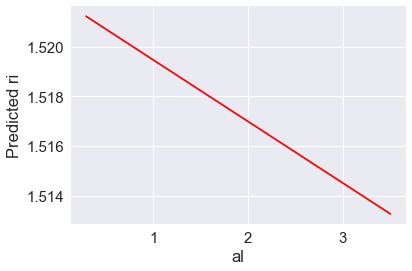

In [10]:
# plot those predictions connected by a line
plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('Predicted ri')

Text(0,0.5,'ri')

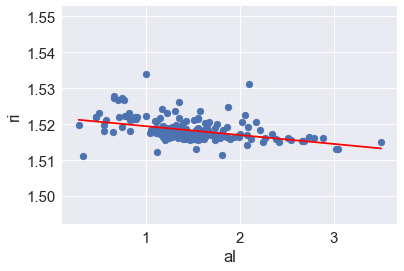

In [11]:
# put the plots together
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('ri')

Refresher: interpreting linear regression coefficients
Linear regression equation: y=$β_0+β_1x$

In [12]:
# compute prediction for al=2 using the equation
linreg.intercept_ + linreg.coef_ * 2

array([1.51699012])

In [13]:
# compute prediction for al=2 using the predict method
linreg.predict([[2]])

array([1.51699012])

In [14]:
# examine coefficient for al
for i in zip(feature_cols, linreg.coef_):
    print(i)

('al', -0.0024776063874696235)


Interpretation: A 1 unit increase in 'al' is associated with a 0.0025 unit decrease in 'ri'.

#### Part 2: Predicting a Categorical Response

In [15]:
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type', 'ri_pred'], dtype='object')

In [16]:
# examine glass_type
glass.Type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

In [18]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,ri_pred,household
Id,,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0


Let's change our task, so that we're predicting household using al. Let's visualize the relationship to figure out how to do this:

Text(0, 0.5, 'household')

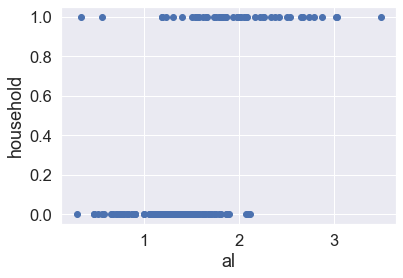

In [19]:
plt.scatter(glass.Al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

Let's draw a regression line, like we did before:

In [20]:
# fit a linear regression model and store the predictions
feature_cols = ['Al']
X = glass[feature_cols]
y = glass.household
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

Text(0, 0.5, 'household')

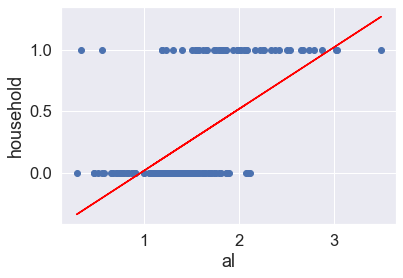

In [22]:
# scatter plot that includes the regression line
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

If al=3, what class do we predict for household? 1

If al=1.5, what class do we predict for household? 0

We predict the 0 class for lower values of al, and the 1 class for higher values of al. What's our cutoff value? Around al=2, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if household_pred >= 0.5, we predict a class of 1, else we predict a class of 0.

In [20]:
# understanding np.where
import numpy as np
nums = np.array([5, 15, 8])

# np.where returns the first value if the condition is True, and the second value if the condition is False
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], dtype='<U5')

In [28]:
# transform household_pred to 1 or 0
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,ri_pred,household,household_pred,household_pred_class
Id,,,,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0,0.065459,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0,0.195765,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0,0.285976,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0,0.160682,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0,0.135623,0


Text(0, 0.5, 'household')

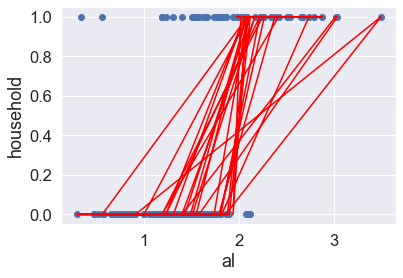

In [25]:
# plot the class predictions
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

Part 3: Using Logistic Regression Instead
Logistic regression can do what we just did:

In [29]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
feature_cols = ['Al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class_log'] = logreg.predict(X)

In [30]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,ri_pred,household,household_pred,household_pred_class,household_pred_class_log
Id,,,,,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0,0.065459,0,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0,0.195765,0,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0,0.285976,0,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0,0.160682,0,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0,0.135623,0,0


Text(0, 0.5, 'household')

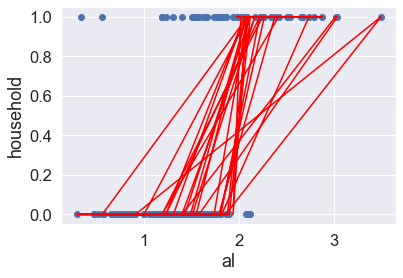

In [32]:
# plot the class predictions
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

#### What if we wanted the predicted probabilities instead of just the class predictions, to understand how confident we are in a given prediction?

In [37]:
logreg.predict_proba(X)[:,1]

array([0.07026349, 0.1452066 , 0.22935267, 0.12017597, 0.10465651,
       0.27632681, 0.07885246, 0.06074468, 0.1491161 , 0.1452066 ,
       0.24055002, 0.11374271, 0.16136657, 0.11374271, 0.126921  ,
       0.10177322, 0.08349827, 0.03780279, 0.08839152, 0.32197875,
       0.20298702, 0.0060241 , 0.12017597, 0.14138256, 0.08114506,
       0.09621736, 0.16562686, 0.13398694, 0.17441716, 0.11692096,
       0.12350894, 0.07885246, 0.10177322, 0.15311201, 0.13764302,
       0.09621736, 0.1304133 , 0.14138256, 0.01050637, 0.01050637,
       0.07444415, 0.09354227, 0.13398694, 0.02261169, 0.09093408,
       0.14138256, 0.08839152, 0.02193337, 0.02796727, 0.10177322,
       0.01188403, 0.11692096, 0.09093408, 0.11692096, 0.12017597,
       0.12017597, 0.07444415, 0.12017597, 0.08591334, 0.09093408,
       0.07232598, 0.1304133 , 0.03668586, 0.02713275, 0.03895236,
       0.07444415, 0.0356007 , 0.0356007 , 0.03895236, 0.03062309,
       0.35687945, 0.11374271, 0.21852657, 0.24628691, 0.22935

In [33]:
# store the predicted probabilites of class 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [34]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,ri_pred,household,household_pred,household_pred_class,household_pred_class_log,household_pred_prob
Id,,,,,,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0,0.065459,0,0,0.070263
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0,0.195765,0,0,0.145207
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0,0.285976,0,0,0.229353
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0,0.160682,0,0,0.120176
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0,0.135623,0,0,0.104657


Text(0, 0.5, 'household')

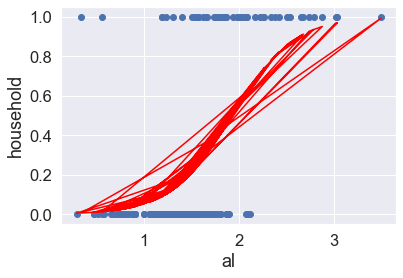

In [38]:
# plot the predicted probabilities
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [39]:
# examine some example predictions
print (logreg.predict_proba([[1]]))
print (logreg.predict_proba([[2]]))
print (logreg.predict_proba([[3]]))

[[0.94755733 0.05244267]]
[[0.4449707 0.5550293]]
[[0.03435025 0.96564975]]


#### The first column indicates the predicted probability of class 0, and the second column indicates the predicted probability of class 1.

In [ ]:
logreg.

In [40]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})

table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


#### What is e? It is the base rate of growth shared by all continually growing processes:

In [41]:
# exponential function: e^1
np.exp(1)

2.718281828459045

#### What is a (natural) log? It gives you the time needed to reach a certain level of growth:

In [42]:
# time needed to grow 1 unit to 2.718 units
np.log(2.718)

0.999896315728952

It is also the inverse of the exponential function:

In [25]:
np.log(np.exp(5))

5.0

In [43]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


#### Interpreting Logistic Regression Coefficients

Text(0, 0.5, 'household')

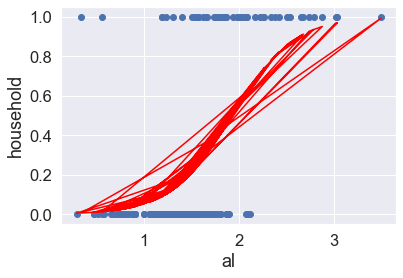

In [44]:
# plot the predicted probabilities again
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [45]:
# compute predicted log-odds for al=2 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 2
logodds

array([0.22101248])

In [46]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([1.247339])

In [47]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([0.5550293])

In [34]:
# compute predicted probability for al=2 using the predict_proba method
logreg.predict_proba([[2]])[:, 1]

array([0.65638445])

In [35]:
logreg.predict_proba([[2]])

array([[0.34361555, 0.65638445]])

In [45]:
# examine the coefficient for al
for i in zip(feature_cols, logreg.coef_[0]):
    print(i)

('al', 4.180403861451099)


#### Interpretation: A 1 unit increase in 'al' is associated with a 4.18 unit increase in the log-odds of 'household'.

In [46]:
# increasing al by 1 (so that al=3) increases the log-odds by 4.18
logodds = 0.64722323 + 4.1804038614510901
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.9920580839167457

In [47]:
# compute predicted probability for al=3 using the predict_proba method
logreg.predict_proba([[3]])[:, 1]

array([0.99205808])

Bottom line: Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

In [48]:
# examine the intercept
logreg.intercept_

array([-7.71358449])

Interpretation: For an 'al' value of 0, the log-odds of 'household' is -7.71.

In [49]:
# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([0.00044652])

That makes sense from the plot above, because the probability of household=1 should be very low for such a low 'al' value.

#### Using Logistic Regression with Categorical Features

In [85]:
# create a categorical feature
glass['high_ba'] = np.where(glass.ba > 0.5, 1, 0)

Logistic : bool, optional

If True, assume that y is a binary variable and use statsmodels to estimate a logistic regression model. 

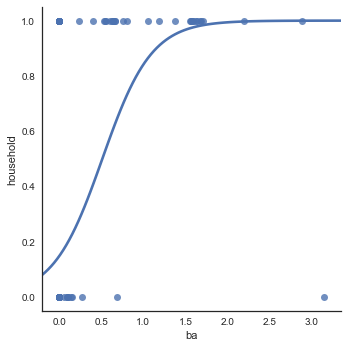

In [100]:
# original (continuous) feature
sns.lmplot(x='ba', y='household', data=glass, ci=None, logistic=True)

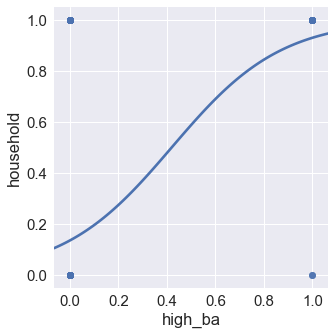

In [87]:
# categorical feature
sns.lmplot(x='high_ba', y='household', data=glass, ci=None, logistic=True)

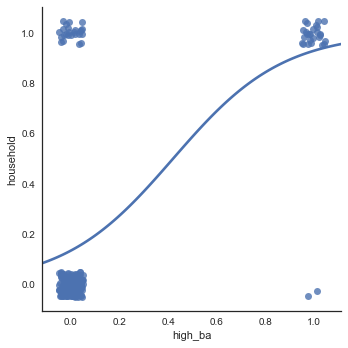

In [99]:
# categorical feature, with jitter added
sns.lmplot(x='high_ba', 
           y='household', 
           data=glass, 
           ci=None, 
           logistic=True, 
           x_jitter=0.05, 
           y_jitter=0.05
          )

#### Jitters

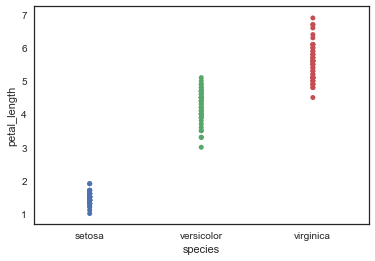

In [93]:
iris = sns.load_dataset('iris')
sns.set(style="white", color_codes=True)
sns.stripplot(x='species', y='petal_length', data=iris)


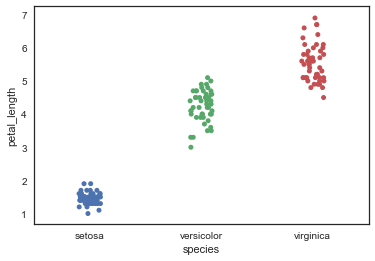

In [94]:
sns.stripplot(x='species', y='petal_length', data=iris, jitter=True)
#sns.despine()

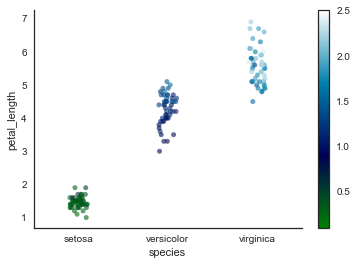

In [95]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

plot = sns.stripplot(x='species', y='petal_length', hue='petal_width', data=iris, 
              palette='ocean', 
              jitter=True, edgecolor='none', alpha=.60)
plot.get_legend().set_visible(False)
sns.despine()
iris.describe()

# Drawing the side color bar
normalize = mcolors.Normalize(vmin=iris['petal_width'].min(), vmax=iris['petal_width'].max())
colormap = cm.ocean

for n in iris['petal_width']:
    plt.plot(color=colormap(normalize(n)))

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(iris['petal_width'])
plt.colorbar(scalarmappaple)

In [101]:
# fit a logistic regression model
feature_cols = ['high_ba']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [102]:
# examine the coefficient for high_ba
for i in zip(feature_cols, logreg.coef_[0]):
    print(i)

('high_ba', 4.4273153450187195)


__Interpretation__: Having a high 'ba' value is associated with a 4.43 unit increase in the log-odds of 'household' (as compared to a low 'ba' value).